# Linked Structures

## Agenda

1. Motives
2. Objectives
3. Mechanisms

## 1. Motives

In [1]:
lst = list(range(10))

In [2]:
lst.insert(0,None)

In [3]:
lst

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
del lst[0]

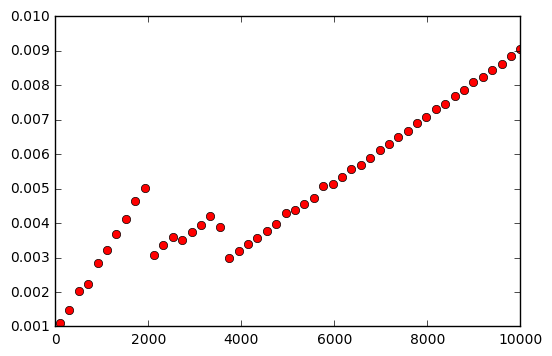

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('lst.insert(0, None) ; del lst[0]',
                  'lst = list(range({}))'.format(n),
                  number=1000)

ns = np.linspace(100, 10000, 50)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

In [ ]:
# consider:

def concatenate(arr1, arr2):
    """Concatenates the contents of arr1 and arr2 as efficiently (time-wise)
    as possible, so that the resulting structure can be used to index all
    combined elements (arr1's followed by arr2's)."""

    # option 1:
    for x in arr2:
        arr1.append(x)
    return arr1

    # option 2:
    arr1.extend(arr2)
    return arr1

    # option 3:
    return arr1 + arr2

## 2. Objectives

We need a new data storage mechanism for constructing data structures that:

- does not require monolithic, contiguous memory allocation,
- allows individual elements to be flexibly and efficiently reorganized,
- and preserves the ability to locate (e.g., via position) and iterate over elements

## 3. Mechanisms

### 3.1. Two-Element Lists

In [6]:
# data items
i1 = 'lions'
i2 = 'tigers'
i3 = 'bears'
i4 = 'oh, my'

In [7]:
# creating individual "links"
link1 = [i1,None]
link2 = [i2,None]
link3 = [i3,None]
link4 = [i4,None]

In [9]:
# link-ing them together
link1[1] = link2#Stores a reference to the object in the 2nd slot of the list
link2[1] = link3
link3[1] = link4

In [10]:
link1[0]

'lions'

In [11]:
link2[0]

'tigers'

In [12]:
link1[1][0]

'tigers'

In [13]:
link1[1][1][1][0]

'oh, my'

In [14]:
head = link1
while head:
    print(head[0])
    head = head[1]#Not copying the value, just changing the reference

lions
tigers
bears
oh, my


In [15]:
link0 = ['walruses',link1] #Big(O) 1

In [ ]:
# prepending

In [16]:
head = link0
while head:
    print(head[0])
    head = head[1]

walruses
lions
tigers
bears
oh, my


In [17]:
def link_iter(head): #Generator function
    while head:
        yield head[0] #Returns a value but it can return others as well
        head = head[1]

In [ ]:
# iteration

In [19]:
for x in link_iter(link0):
    print(x)

walruses
lions
tigers
bears
oh, my


In [21]:
link0[1][1][1] = ['goats', link0[1][1][1]] #Insertion, uses old value before replacing it

In [22]:
for x in link_iter(link0):
    print(x)

walruses
lions
tigers
goats
goats
bears
oh, my


In [ ]:
# insertion

### 3.2. "Link" objects

In [23]:
class Link:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

In [24]:
# manually constructing a list
head = Link(i4)

In [25]:
head.val

'oh, my'

In [28]:
head = Link(i3, head)

In [29]:
head = Link(i2, head)

In [30]:
head = Link(i1, head)

In [31]:
def linked_list_iter(node):
    while node:
        yield node.val
        node = node.next

In [32]:
for x in linked_list_iter(head):
    print(x)

lions
tigers
bears
bears
oh, my


In [ ]:
# iteration

In [ ]:
# iteration based on a recursive pattern

In [33]:
class LinkedList:
    def __init__(self):
        self.head = None
        
    def prepend(self, val):
        self.head = Link(val, self.head)
        
    def __iter__(self):
        cursor = self.head
        while cursor:
            yield cursor.val
            cursor = cursor.next
            
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [35]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)

In [39]:
for x in lst:
    print(x)

9
8
7
6
5
4
3
2
1
0


In [40]:
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [41]:
class BinaryLink:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
# manual construction of a "tree"

In [43]:
root = BinaryLink(10)
root.left = BinaryLink(20)
root.left.left = BinaryLink(15)
root.right = BinaryLink(30)
root.right.right = BinaryLink(45)

In [44]:
def tree_iter(root):
    if root:
        yield root.val
        yield from tree_iter(root.left)
        yield from tree_iter(root.right)

In [45]:
for i in tree_iter(root):
    print(i)

10
20
15
30
45


In [46]:
class NaryLink:
    def __init__(self, val, n=2):
        self.val = val
        self.children = [None] * n
        
    def __getitem__(self, idx):
        return self.children[idx]
    
    def __setitem__(self, idx, val):
        self.children[idx] = val
        
    def __iter__(self):
        for c in self.children:
            yield c

In [47]:
root = NaryLink('Kingdoms', n=5)

root[0] = NaryLink('Animalia', n=35)
root[1] = NaryLink('Plantae', n=12)
root[2] = NaryLink('Fungi', n=7)
root[3] = NaryLink('Protista', n=5)
root[4] = NaryLink('Monera', n=5)

root[2][0] = NaryLink('Chytridiomycota')
root[2][1] = NaryLink('Blastocladiomycota')
root[2][2] = NaryLink('Glomeromycota')
root[2][3] = NaryLink('Ascomycota')
root[2][4] = NaryLink('Basidiomycota')
root[2][5] = NaryLink('Microsporidia')
root[2][6] = NaryLink('Neocallimastigomycota')

def tree_iter(root):
    if root:
        yield root.val
        for c in root:
            yield from tree_iter(c)

In [48]:
for x in tree_iter(root):
    print(x)

Kingdoms
Animalia
Plantae
Fungi
Chytridiomycota
Blastocladiomycota
Glomeromycota
Ascomycota
Basidiomycota
Microsporidia
Neocallimastigomycota
Protista
Monera


## Run-time analysis

Run-time complexities for circular, doubly-linked list of 
N
N
elements:
indexing (position-based access) = 
O(N)
O(N)
search (unsorted) = 
O(N)
O(N)
search (sorted) = 
O(N)
O(N)
--- binary search isn't possible!
prepend = 
O(1)
O(1)
append = 
O(1)
O(1)
insertion at arbitrary position: traversal = 
O(N)
O(N)
+ insertion = 
O(1)
O(1)
deletion of arbitrary element: traversal = 
O(N)
O(N)
+ deletion = 
O(1)
O(1)
    print(x)